## K-Means Algorithm

In [1]:
from math import sqrt
import random

def readfile(filename):
    lines = [line for line in file(filename)]

  # First line is the column titles
    colnames = lines[0].strip().split('\t')[1:]
    rownames = []
    data = []
    for line in lines[1:]:
        p = line.strip().split('\t')
    # First column in each row is the rowname
        rownames.append(p[0])
    # The data for this row is the remainder of the row
        data.append([float(x) for x in p[1:]])
    return (rownames, colnames, data)

In [2]:
blognames,words,data=readfile('blogdata.txt')

In [3]:
def pearson(v1, v2):
  # Simple sums
    sum1 = sum(v1)
    sum2 = sum(v2)

  # Sums of the squares
    sum1Sq = sum([pow(v, 2) for v in v1])
    sum2Sq = sum([pow(v, 2) for v in v2])

  # Sum of the products
    pSum = sum([v1[i] * v2[i] for i in range(len(v1))])

  # Calculate r (Pearson score)
    num = pSum - sum1 * sum2 / len(v1)
    den = sqrt((sum1Sq - pow(sum1, 2) / len(v1)) * (sum2Sq - pow(sum2, 2)
               / len(v1)))
    if den == 0:
        return 0

    return 1.0 - num / den

In [4]:
def kmeans(rows, distance=pearson, k=4):
  # Determine the minimum and maximum values for each point
    ranges = [(min([row[i] for row in rows]), max([row[i] for row in rows]))
              for i in range(len(rows[0]))]

  # Create k randomly placed centroids
    clusters = [[random.random() * (ranges[i][1] - ranges[i][0]) + ranges[i][0]
                for i in range(len(rows[0]))] for j in range(k)]

    lastmatches = None
    for t in range(100):
        print 'Iteration %d' % t
        bestmatches = [[] for i in range(k)]

    # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row = rows[j]
            bestmatch = 0
            for i in range(k):
                d = distance(clusters[i], row)
                if d < distance(clusters[bestmatch], row):
                    bestmatch = i
            bestmatches[bestmatch].append(j)

    # If the results are the same as last time, this is complete
        if bestmatches == lastmatches:
            break
        lastmatches = bestmatches

    # Move the centroids to the average of their members
        for i in range(k):
            avgs = [0.0] * len(rows[0])
            if len(bestmatches[i]) > 0:
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m] += rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j] /= len(bestmatches[i])
                clusters[i] = avgs

    return bestmatches

In [5]:
kmean_result = kmeans(data, distance=pearson, k=10)

Iteration 0
Iteration 1
Iteration 2
Iteration 3


In [6]:
print [blognames[id] for id in kmean_result[0]]

['Online Marketing Report', 'Andrew Sullivan | The Daily Dish', 'ScienceBlogs : Combined Feed', 'Michelle Malkin', 'Gothamist', "Captain's Quarters", 'Power Line', 'The Blotter', 'TMZ.com', 'Think Progress', 'Little Green Footballs', 'Pharyngula', "Joi Ito's Web"]


In [7]:
def tanamoto(v1, v2):
    (c1, c2, shr) = (0, 0, 0)

    for i in range(len(v1)):
        if v1[i] != 0:  # in v1
            c1 += 1
        if v2[i] != 0:  # in v2
            c2 += 1
        if v1[i] != 0 and v2[i] != 0:  # in both
            shr += 1

    return 1.0 - float(shr) / (c1 + c2 - shr)

## Multi-Dimensional Scaling 視覺化
https://en.wikipedia.org/wiki/Multidimensional_scaling 

In [14]:
def Multi_Dimensional_Scaling(data, distance=pearson, rate=0.01):
    n = len(data)

  # The real distances between every pair of items
    realdist = [[distance(data[i], data[j]) for j in range(n)] for i in
                range(0, n)]

  # Randomly initialize the starting points of the locations in 2D
    loc = [[random.random(), random.random()] for i in range(n)]
    #print loc
    
    fakedist = [[0.0 for j in range(n)] for i in range(n)]

    lasterror = None
    for m in range(0, 1000):
    # Find projected distances
        for i in range(n):
            for j in range(n):
                fakedist[i][j] = sqrt(sum([pow(loc[i][x] - loc[j][x], 2)
                                      for x in range(len(loc[i]))]))

    # Move points
        grad = [[0.0, 0.0] for i in range(n)]

        totalerror = 0
        for k in range(n):
            for j in range(n):
                if j == k:
                    continue
        # The error is percent difference between the distances
                errorterm = (fakedist[j][k] - realdist[j][k]) / realdist[j][k]

        # Each point needs to be moved away from or towards the other
        # point in proportion to how much error it has
                grad[k][0] += (loc[k][0] - loc[j][0]) / fakedist[j][k] \
                    * errorterm
                grad[k][1] += (loc[k][1] - loc[j][1]) / fakedist[j][k] \
                    * errorterm

        # Keep track of the total error
                totalerror += abs(errorterm)
        #print totalerror

    # If the answer got worse by moving the points, we are done
        if lasterror and lasterror < totalerror:
            break
        lasterror = totalerror

    # Move each of the points by the learning rate times the gradient
        for k in range(n):
            loc[k][0] -= rate * grad[k][0]
            loc[k][1] -= rate * grad[k][1]

    return loc

In [15]:
Multi_Dimensional_Scaling(data)

[[0.8259089034534223, 1.0227079290469052],
 [0.5631949422027653, 0.9310101631038044],
 [-0.037603103529186985, 0.3129402827674788],
 [0.23454169647214024, 1.0038086200580525],
 [0.4599017830634706, 0.773896035102241],
 [0.16145166585775297, -0.21107689310642494],
 [0.9410689158624039, 0.5562079785730409],
 [-0.15828050782496492, 0.4326772073191312],
 [0.4309917904339378, 0.30022816277830344],
 [0.9001717718317757, 0.8887322002684729],
 [0.7457523930872872, 0.26743060020658366],
 [1.1078827064642731, 0.38743797097975086],
 [-0.10105471736884676, 0.9707928027368979],
 [0.7555248115387089, -0.20422320858782922],
 [0.9274144605557925, 0.7454335993261562],
 [0.10843429227432584, 1.1488157129136243],
 [-0.037709713252136394, -0.002618567166060456],
 [1.2622035471495014, 0.6334057656636147],
 [0.33453191079255945, 1.0824455020647052],
 [0.7671743936301487, 0.8343214255322583],
 [0.9290846739943548, 1.0474169686887076],
 [0.3068579257988912, -0.17475080152661915],
 [0.28935267138676496, 1.2127

In [10]:
def draw2d(data, labels, jpeg='mds2d.jpg'):
    img = Image.new('RGB', (2000, 2000), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    for i in range(len(data)):
        x = (data[i][0] + 0.5) * 1000
        y = (data[i][1] + 0.5) * 1000
        draw.text((x, y), labels[i], (100, 0, 0))
    img.save(jpeg, 'JPEG')

In [11]:
from PIL import Image, ImageDraw
draw2d(result, blognames)

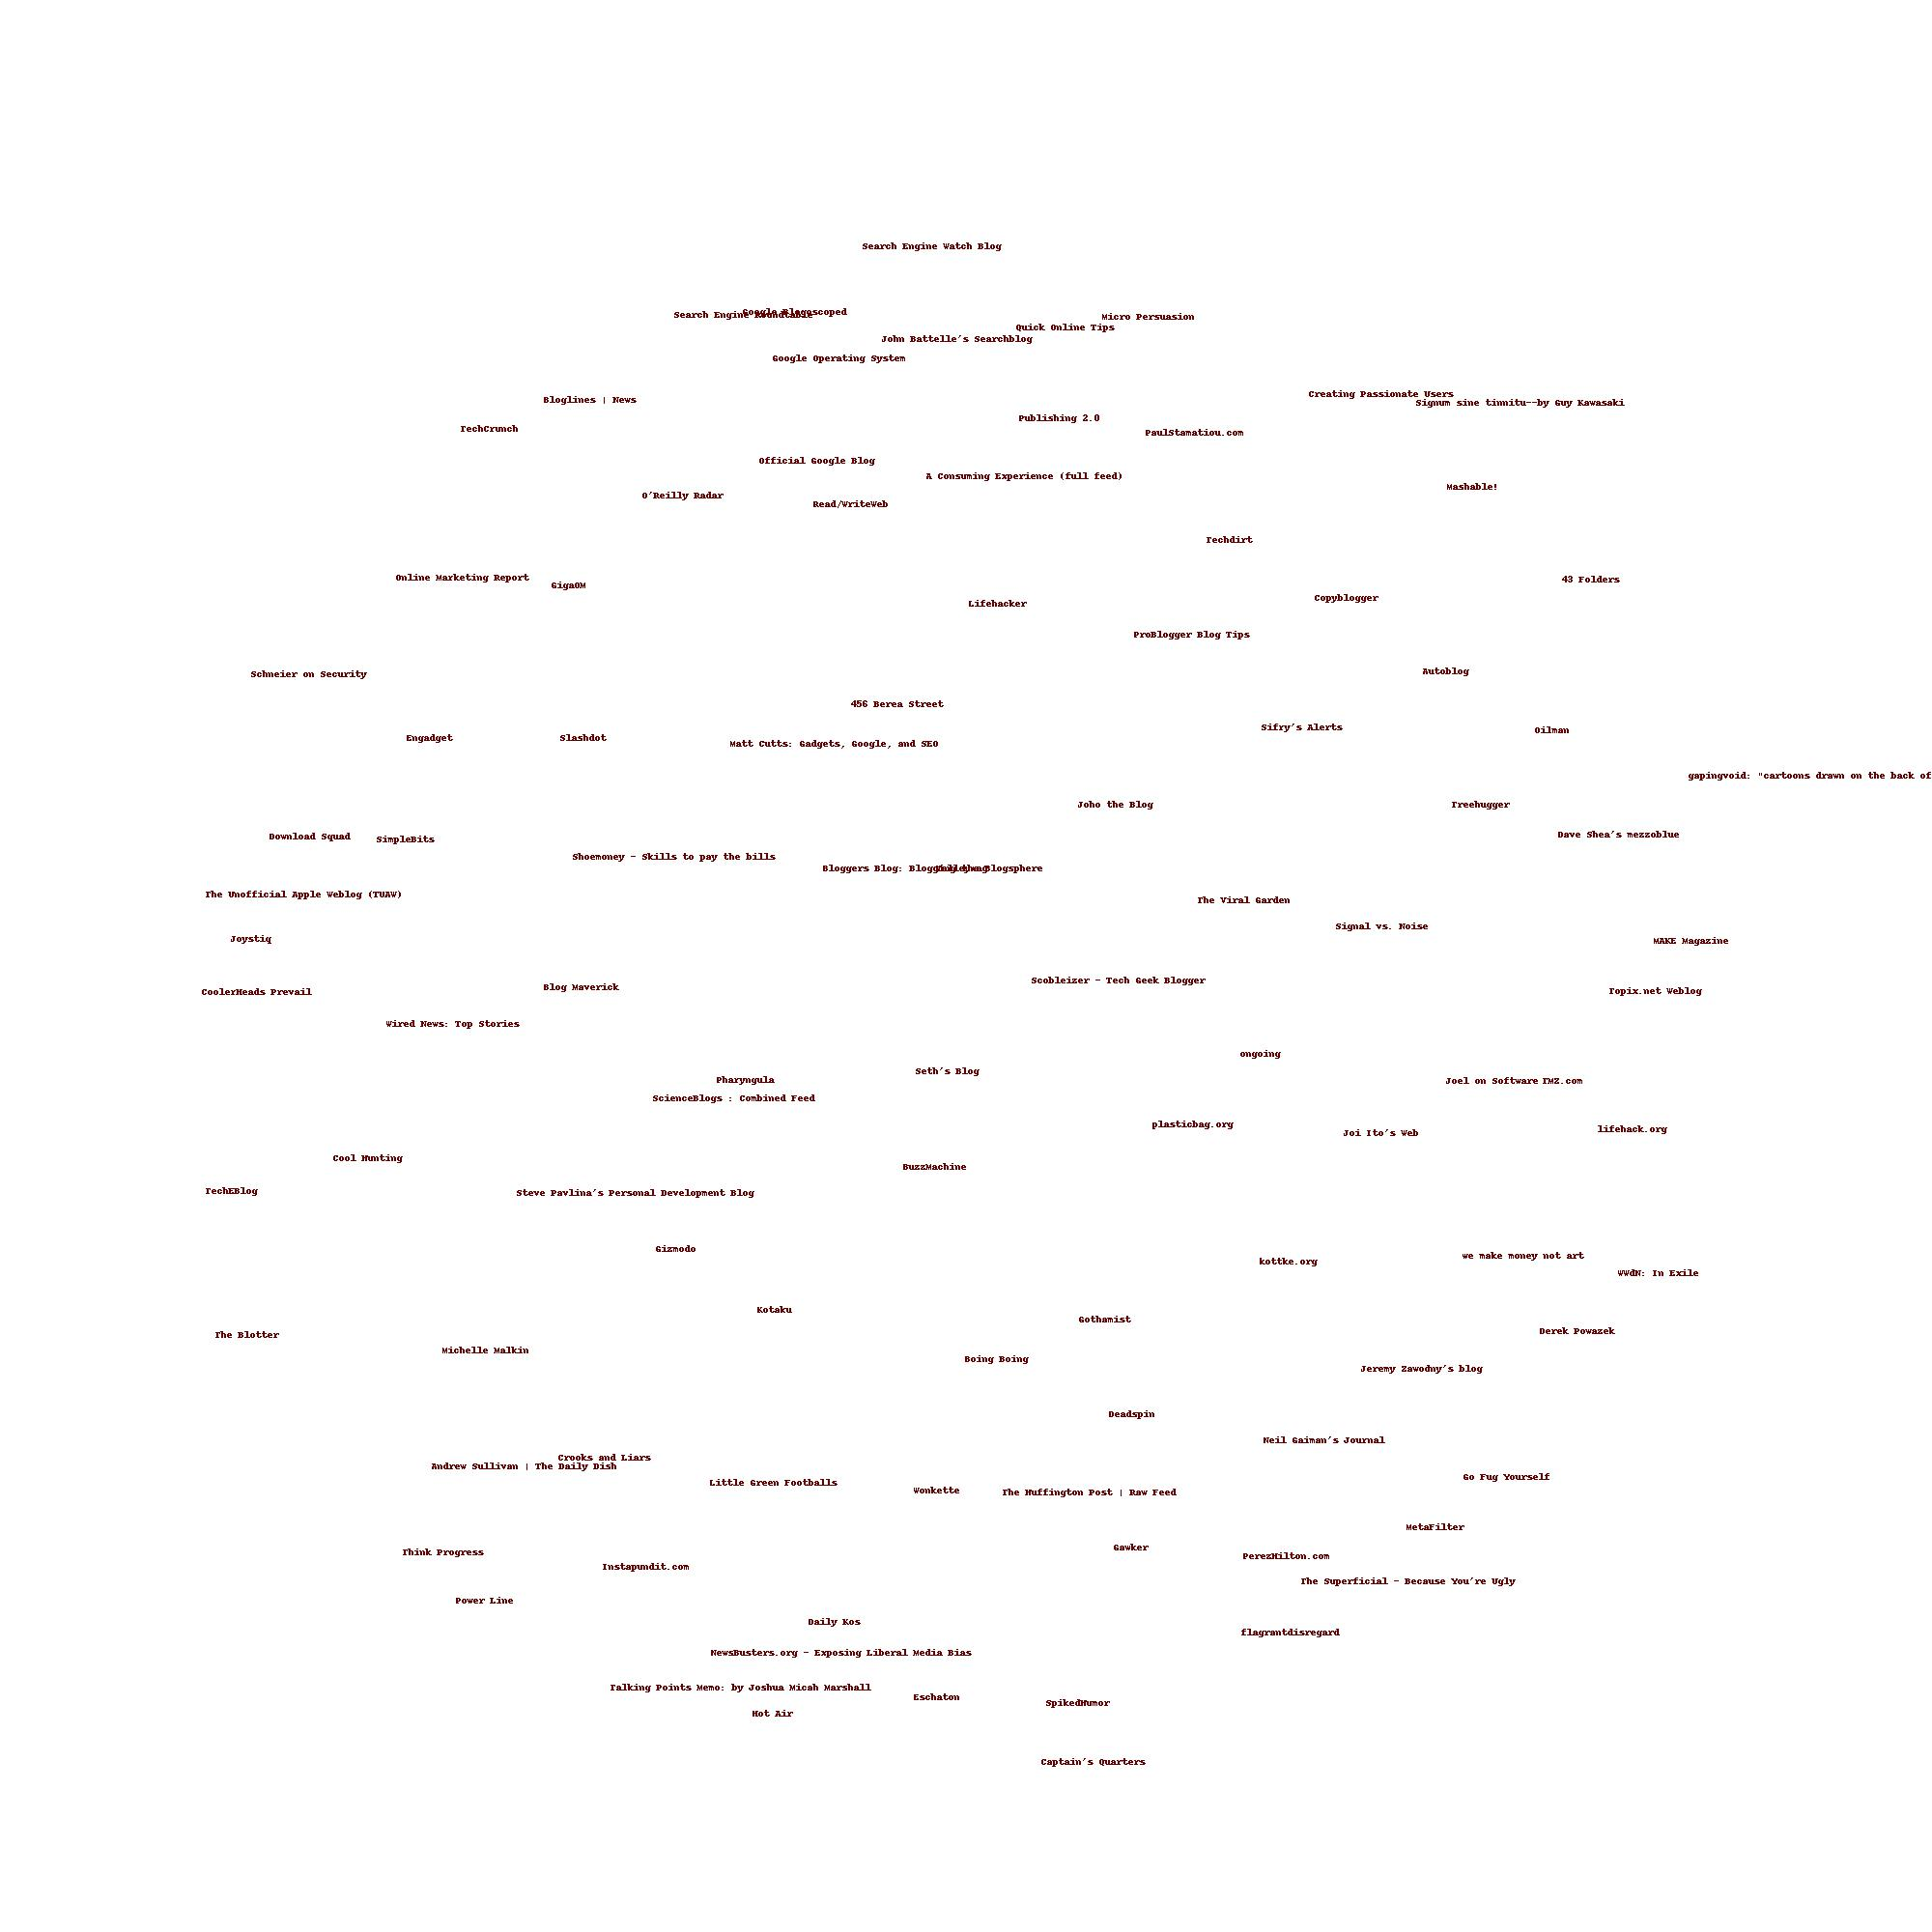

In [12]:
from IPython.display import Image
Image(filename='mds2d.jpg')